<a href="https://colab.research.google.com/github/IMI1998/Pan_Card_Tempering/blob/main/Pan_Card_Tempring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image

mkdir: cannot create directory ‘pan_card_tempering’: File exists
mkdir: cannot create directory ‘pan_card_tempering/image’: File exists


In [ ]:
train = Image.open('pan_card_tempering/image/1.jpg')
test = Image.open('pan_card_tempering/image/2.jpg')


In [ ]:
train = train.resize((500 , 500))
train.save('pan_card_tempering/image/1.jpg')
test = test.resize((500 , 500))
test.save('pan_card_tempering/image/2.jpg')

In [ ]:
train = cv2.imread('pan_card_tempering/image/1.jpg')
test = cv2.imread('pan_card_tempering/image/2.jpg')

In [ ]:
train_gray = cv2.cvtColor(train , cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test , cv2.COLOR_BGR2GRAY)

In [ ]:
(score , diff) = structural_similarity(train_gray , test_gray , full=True)
diff = (diff * 255).astype('uint8')
score

0.09998222074947297

In [ ]:
thresh = cv2.threshold(diff , 0 , 255 , cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnt = cv2.findContours(thresh.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)

In [ ]:
for c in cnt:
    (x ,y ,w ,h) = cv2.boundingRect(c)
    cv2.rectangle(train , (x,y) , (x+w , y+h) , (0,0,255) , 2 )
    cv2.rectangle(test , (x,y) , (x+w , y+h) , (0,0,255) , 2 )


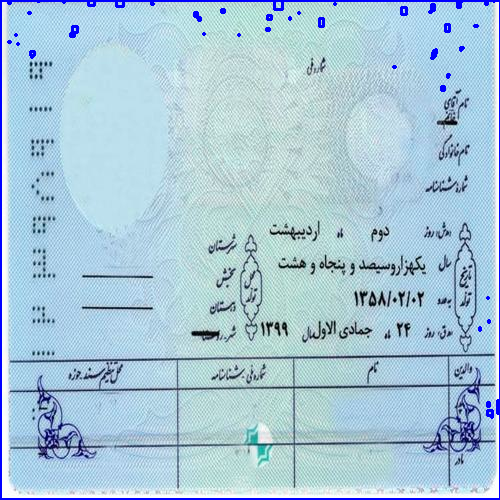

In [ ]:
Image.fromarray(train)

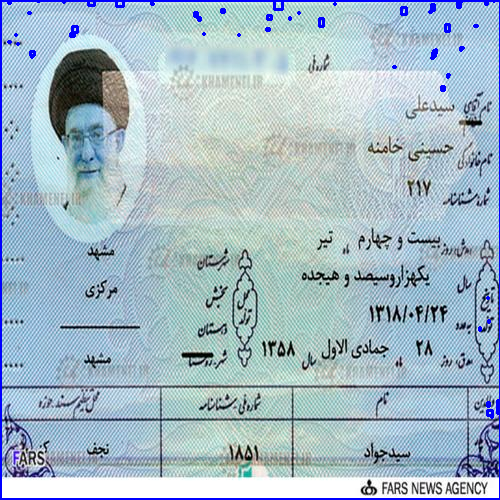

In [ ]:
Image.fromarray(test)

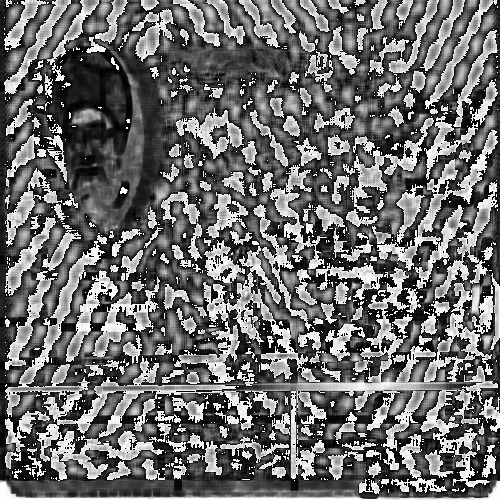

In [ ]:
Image.fromarray(diff)

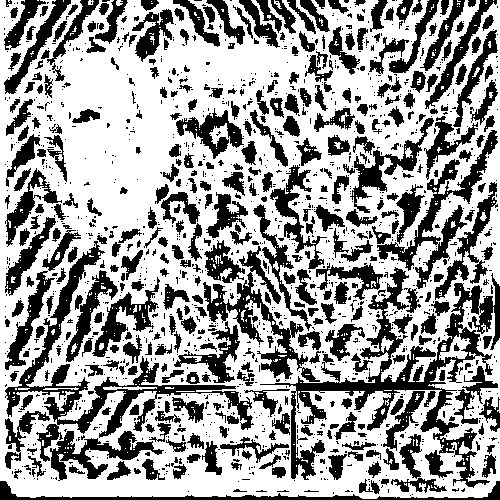

In [ ]:
Image.fromarray(thresh)